<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(_0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n250.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.028018,198.744842,198.768724,-0.023882
1,0.0,1.0,57.329540,88.266135,33.974483,-0.101213,189.468946,189.549901,-0.080955
2,0.0,2.0,45.215694,22.043105,89.071799,0.690223,167.020820,166.355867,0.664953
3,0.0,3.0,69.375325,71.150993,24.742899,0.242466,175.511683,175.271125,0.240558
4,0.0,4.0,87.837297,47.725671,65.999025,-0.346266,211.215726,211.564380,-0.348654
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,0.218753,120.330628,120.037904,0.292724
249996,999.0,246.0,65.758199,97.986011,91.293587,-0.465133,264.572663,265.002896,-0.430233
249997,999.0,247.0,43.850566,82.988350,93.879229,0.420890,231.139035,230.626058,0.512977
249998,999.0,248.0,44.150395,26.941848,96.556657,-0.126735,177.522166,177.503148,0.019018


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.028018,198.744842,198.768724,-0.023882
1,0.0,1.0,57.329540,88.266135,33.974483,-0.101213,189.468946,189.549901,-0.080955
2,0.0,2.0,45.215694,22.043105,89.071799,0.690223,167.020820,166.355867,0.664953
3,0.0,3.0,69.375325,71.150993,24.742899,0.242466,175.511683,175.271125,0.240558
4,0.0,4.0,87.837297,47.725671,65.999025,-0.346266,211.215726,211.564380,-0.348654
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,0.218753,120.330628,120.037904,0.292724
249996,999.0,246.0,65.758199,97.986011,91.293587,-0.465133,264.572663,265.002896,-0.430233
249997,999.0,247.0,43.850566,82.988350,93.879229,0.420890,231.139035,230.626058,0.512977
249998,999.0,248.0,44.150395,26.941848,96.556657,-0.126735,177.522166,177.503148,0.019018


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  58.707153  61.211187 -0.028018  198.744842   
      1.0    57.329540  88.266135  33.974483 -0.101213  189.468946   
      2.0    45.215694  22.043105  89.071799  0.690223  167.020820   
      3.0    69.375325  71.150993  24.742899  0.242466  175.511683   
      4.0    87.837297  47.725671  65.999025 -0.346266  211.215726   
...                ...        ...        ...       ...         ...   
999.0 245.0  22.462586  64.986534  22.662754  0.218753  120.330628   
      246.0  65.758199  97.986011  91.293587 -0.465133  264.572663   
      247.0  43.850566  82.988350  93.879229  0.420890  231.139035   
      248.0  44.150395  26.941848  96.556657 -0.126735  177.522166   
      249.0  88.062161  23.980807  27.737661 -0.973684  148.806946   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.768724 -0.023882  
      1.0    189.549901 -0.080955  
      2.0    166.355867  0.664953  
      3.0    175.271125  0.240558  
      4.0    211.564380 -0.348654  
...                 ...       ...  
999.0 245.0  120.037904  0.292724  
      246.0  265.002896 -0.430233  
      247.0  230.626058  0.512977  
      248.0  177.503148  0.019018  
      249.0  149.785678 -0.978732  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  58.707153  61.211187 -0.028018  198.744842   
      1.0    57.329540  88.266135  33.974483 -0.101213  189.468946   
      2.0    45.215694  22.043105  89.071799  0.690223  167.020820   
      3.0    69.375325  71.150993  24.742899  0.242466  175.511683   
      4.0    87.837297  47.725671  65.999025 -0.346266  211.215726   
...                ...        ...        ...       ...         ...   
999.0 245.0  22.462586  64.986534  22.662754  0.218753  120.330628   
      246.0  65.758199  97.986011  91.293587 -0.465133  264.572663   
      247.0  43.850566  82.988350  93.879229  0.420890  231.139035   
      248.0  44.150395  26.941848  96.556657 -0.126735  177.522166   
      249.0  88.062161  23.980807  27.737661 -0.973684  148.806946   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.768724 -0.023882  
      1.0    189.549901 -0.080955  
      2.0    166.355867  0.664953  
      3.0    175.271125  0.240558  
      4.0    211.564380 -0.348654  
...                 ...       ...  
999.0 245.0  120.037904  0.292724  
      246.0  265.002896 -0.430233  
      247.0  230.626058  0.512977  
      248.0  177.503148  0.019018  
      249.0  149.785678 -0.978732  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.028018,198.744842,198.768724,-0.023882
1,0.0,1.0,57.329540,88.266135,33.974483,-0.101213,189.468946,189.549901,-0.080955
2,0.0,2.0,45.215694,22.043105,89.071799,0.690223,167.020820,166.355867,0.664953
3,0.0,3.0,69.375325,71.150993,24.742899,0.242466,175.511683,175.271125,0.240558
4,0.0,4.0,87.837297,47.725671,65.999025,-0.346266,211.215726,211.564380,-0.348654
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,22.462586,64.986534,22.662754,0.218753,120.330628,120.037904,0.292724
249996,999.0,246.0,65.758199,97.986011,91.293587,-0.465133,264.572663,265.002896,-0.430233
249997,999.0,247.0,43.850566,82.988350,93.879229,0.420890,231.139035,230.626058,0.512977
249998,999.0,248.0,44.150395,26.941848,96.556657,-0.126735,177.522166,177.503148,0.019018


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    68.854520  58.707153  61.211187 -0.028018  198.744842   
      1.0    57.329540  88.266135  33.974483 -0.101213  189.468946   
      2.0    45.215694  22.043105  89.071799  0.690223  167.020820   
      3.0    69.375325  71.150993  24.742899  0.242466  175.511683   
      4.0    87.837297  47.725671  65.999025 -0.346266  211.215726   
...                ...        ...        ...       ...         ...   
999.0 245.0  22.462586  64.986534  22.662754  0.218753  120.330628   
      246.0  65.758199  97.986011  91.293587 -0.465133  264.572663   
      247.0  43.850566  82.988350  93.879229  0.420890  231.139035   
      248.0  44.150395  26.941848  96.556657 -0.126735  177.522166   
      249.0  88.062161  23.980807  27.737661 -0.973684  148.806946   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    198.768724 -0.023882  
      1.0    189.549901 -0.080955  
      2.0    166.355867  0.664953  
      3.0    175.271125  0.240558  
      4.0    211.564380 -0.348654  
...                 ...       ...  
999.0 245.0  120.037904  0.292724  
      246.0  265.002896 -0.430233  
      247.0  230.626058  0.512977  
      248.0  177.503148  0.019018  
      249.0  149.785678 -0.978732  

[250000 rows x 7 columns]

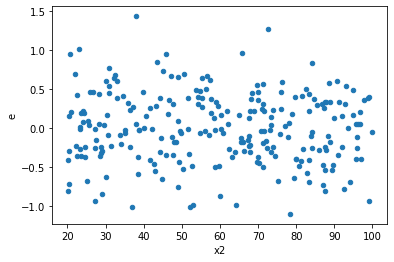

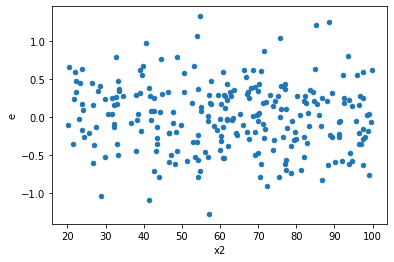

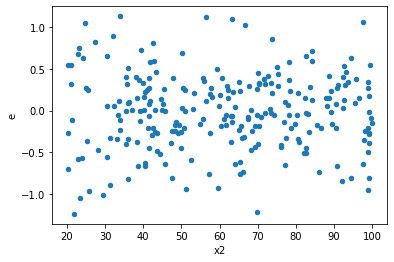

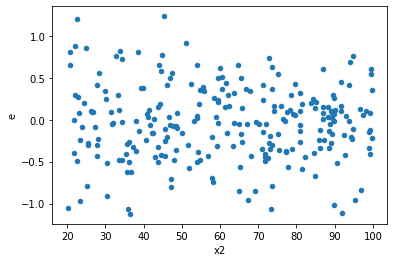

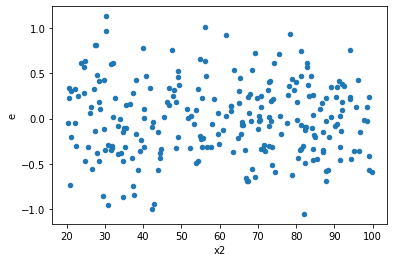

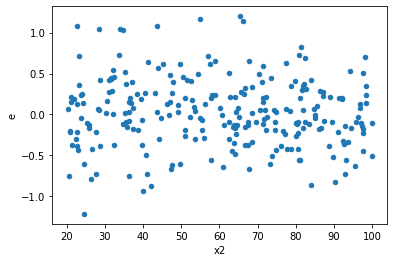

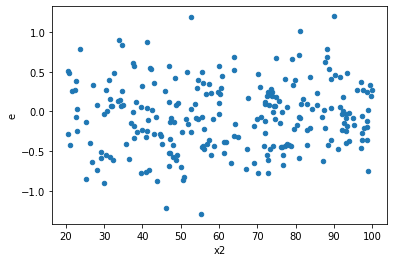

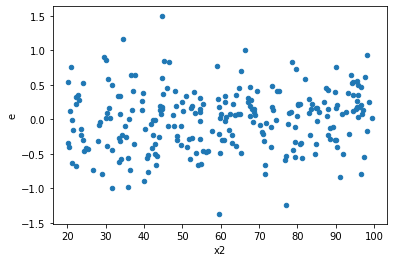

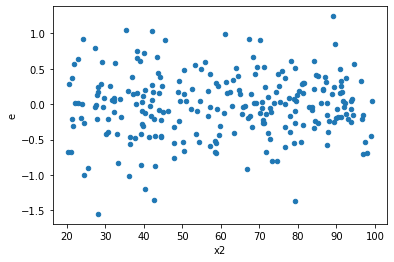

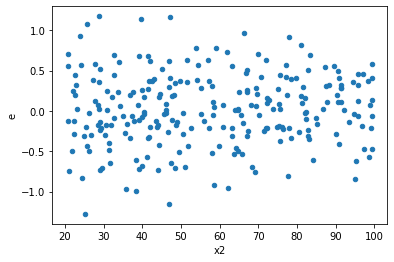

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,97.0,97.0,18.91550913852398,20.861005724972774,0.19500524885076267,0.21506191469044098,1.1028519281295226,0.6306853439827562,0.6846573280086219,0.3153426719913781,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,14.322976293971811,14.877624738680332,0.1476595494223898,0.15337757462557045,1.0387243847455059,0.8519674771017254,0.5740162614491373,0.4259837385508627,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,17.492835536940312,18.632211608416423,0.1803385106901063,0.19208465575687034,1.0651338697531367,0.7566305942741773,0.6216847028629113,0.37831529713708867,Reject005=1 : Homoscedasticity
11.0,97.0,97.0,19.64065474635174,20.321609591792264,0.20248097676651278,0.20950112981229138,1.0346706794775775,0.867052019398709,0.5664739903006455,0.4335260096993545,Reject005=1 : Homoscedasticity
23.0,97.0,97.0,15.509035193574443,20.46894383454824,0.1598869607584994,0.21102003953142517,1.319807684944112,0.17358583458345378,0.9132070827082731,0.08679291729172689,Reject005=1 : Homoscedasticity
26.0,97.0,97.0,17.200546066316303,18.68121241920428,0.1773252171785186,0.19258981875468328,1.0860825201234485,0.6850795689453446,0.6574602155273277,0.3425397844726723,Reject005=1 : Homoscedasticity
27.0,97.0,97.0,22.559995658197213,23.16725710914227,0.2325772748267754,0.23883770215610586,1.0269176226868824,0.8962003682761275,0.5518998158619363,0.44810018413806374,Reject005=1 : Homoscedasticity
32.0,97.0,97.0,17.50006835363961,17.852134258074493,0.1804130758107176,0.1840426212172628,1.0201179731027543,0.9220649979239579,0.538967501038021,0.46103249896197895,Reject005=1 : Homoscedasticity
36.0,97.0,97.0,16.72515818513069,19.71982116682755,0.17242431118691434,0.20329712543121187,1.1790513996070442,0.4187679175839971,0.7906160412080014,0.20938395879199856,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,18.455358979027103,15.59569766107864,0.1902614327734753,0.16078038825854268,0.8450498133795058,0.4085459804787298,Reject005=1 : Homoscedasticity
1.0,97.0,97.0,19.665220739390477,16.798412793098,0.20273423442670596,0.1731795133309072,0.8542193863834892,0.4392071959828808,Reject005=1 : Homoscedasticity
2.0,97.0,97.0,18.91550913852398,20.861005724972774,0.19500524885076267,0.21506191469044098,1.1028519281295226,0.6306853439827562,Reject005=1 : Homoscedasticity
3.0,97.0,97.0,21.137469579904586,19.210608998716324,0.21791205752478954,0.19804751545068375,0.9088414734836505,0.6387845314105774,Reject005=1 : Homoscedasticity
4.0,97.0,97.0,14.322976293971811,14.877624738680332,0.1476595494223898,0.15337757462557045,1.0387243847455059,0.8519674771017254,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,17.492835536940312,18.632211608416423,0.1803385106901063,0.19208465575687034,1.0651338697531367,0.7566305942741773,Reject005=1 : Homoscedasticity
6.0,97.0,97.0,21.908302207690223,12.943344270353826,0.22585878564629097,0.13343653886962709,0.5907963176539747,0.01016025414051539,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,19.774139246706596,14.490829752844213,0.20385710563615048,0.1493899974520022,0.7328172201102345,0.12755535518350472,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,20.474518268103946,19.045427507793907,0.2110775079185974,0.19634461348241142,0.9302014952636841,0.7223299161374351,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      833
Reject005=0 : Heteroscedasticity    167
Name: Result_test, dtype: int64